<a href="https://colab.research.google.com/github/Zfeng0207/FIT3199-FYP/blob/dev%2Fzfeng/01_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion and Exploratory Data Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Ingestion

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/00_recurrent_stroke_patient.csv')

## Data Profiling

In [5]:
df.head()

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,...,icd_code,icd_version,icd_title,numeric_part,Stroke_Y/N,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10003299,31931401,2183-02-26 20:26:00,97.7,63.0,15.0,97.0,146.0,65.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12
1,10003299,31931401,2183-02-26 21:43:00,NaN,51.0,16.0,97.0,131.0,42.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12
2,10003299,31931401,2183-02-26 22:03:00,NaN,57.0,19.0,100.0,142.0,54.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12
3,10003299,31931401,2183-02-27 02:20:00,NaN,54.0,18.0,97.0,129.0,56.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12
4,10003299,31931401,2183-02-27 06:26:00,98.7,61.0,15.0,98.0,123.0,53.0,NaN,...,R918,10,Other nonspecific abnormal finding of lung field,918,0,F,65,2173,2008 - 2010,2183-08-12


##### Insights
**Observations**


**Key Takeaway**


## Data Quality Check

Check for null values

In [6]:
df.isnull().sum()

,0
subject_id,0
stay_id,0
charttime,269
temperature,32642
heartrate,3369
resprate,4359
o2sat,5610
sbp,3593
dbp,3593
rhythm,65517


note: category has 257 null values

In [7]:
df.duplicated().sum()

0

note: no duplicated rows

##### Insights
**Observations**

**Key Takeaway**


## Exploratory Data Analysis

### Overview of the merged dataset

In [8]:
df.describe()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,seq_num,icd_version,numeric_part,Stroke_Y/N,anchor_age,anchor_year
count,6.796700e+04,6.796700e+04,35325.000000,64598.000000,63608.000000,62357.000000,64374.000000,64374.000000,67967.000000,67967.000000,67967.000000,67967.000000,67967.000000,67967.000000
mean,1.515704e+07,3.497713e+07,97.759187,79.573392,18.013127,97.661502,135.090533,77.725106,1.993011,9.714450,10758.733238,0.136434,66.697633,2154.089058
std,2.995266e+06,2.896217e+06,5.207597,17.940178,3.494282,3.130766,25.854519,461.182056,1.229617,0.451679,22182.225278,0.343251,15.489223,23.501522
min,1.000330e+07,3.000430e+07,7.400000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,9.000000,0.000000,0.000000,19.000000,2110.000000
25%,1.233805e+07,3.245824e+07,97.800000,67.000000,16.000000,96.000000,118.000000,62.000000,1.000000,9.000000,430.000000,0.000000,56.000000,2136.000000
50%,1.536613e+07,3.492089e+07,98.100000,77.000000,18.000000,98.000000,133.000000,72.000000,2.000000,10.000000,876.000000,0.000000,68.000000,2152.000000
75%,1.779868e+07,3.749994e+07,98.400000,89.000000,19.000000,100.000000,151.000000,83.000000,3.000000,10.000000,7295.000000,0.000000,79.000000,2175.000000
max,1.999288e+07,3.999981e+07,105.300000,219.000000,78.000000,199.000000,854.000000,66100.000000,9.000000,10.000000,113593.000000,1.000000,91.000000,2206.000000


In [9]:
print(df.dtypes)

subject_id             int64
stay_id                int64
charttime             object
temperature          float64
heartrate            float64
resprate             float64
o2sat                float64
sbp                  float64
dbp                  float64
rhythm                object
pain                  object
seq_num                int64
icd_code              object
icd_version            int64
icd_title             object
numeric_part           int64
Stroke_Y/N             int64
gender                object
anchor_age             int64
anchor_year            int64
anchor_year_group     object
dod                   object
dtype: object


In [10]:
# Convert datetime columns
df['charttime'] = pd.to_datetime(df['charttime'])
df['dod'] = pd.to_datetime(df['dod'])

# Convert categorical columns to numerical representation
df['rhythm'] = df['rhythm'].astype('category').cat.codes
df['pain'] = df['pain'].astype('category').cat.codes
df['icd_code'] = df['icd_code'].astype('category').cat.codes
df['icd_title'] = df['icd_title'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['anchor_year_group'] = df['anchor_year_group'].astype('category').cat.codes

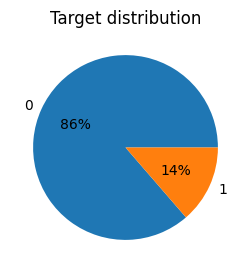

In [11]:
targets = df['Stroke_Y/N']

temp = targets.value_counts()
temp

plt.figure(figsize=(6, 3))
plt.pie(temp, labels=temp.index, autopct="%.0f%%")
plt.title('Target distribution')
plt.show()

array([[<Axes: title={'center': 'subject_id'}>,
        <Axes: title={'center': 'stay_id'}>,
        <Axes: title={'center': 'charttime'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'heartrate'}>],
       [<Axes: title={'center': 'resprate'}>,
        <Axes: title={'center': 'o2sat'}>,
        <Axes: title={'center': 'sbp'}>, <Axes: title={'center': 'dbp'}>,
        <Axes: title={'center': 'rhythm'}>],
       [<Axes: title={'center': 'pain'}>,
        <Axes: title={'center': 'seq_num'}>,
        <Axes: title={'center': 'icd_code'}>,
        <Axes: title={'center': 'icd_version'}>,
        <Axes: title={'center': 'icd_title'}>],
       [<Axes: title={'center': 'numeric_part'}>,
        <Axes: title={'center': 'Stroke_Y/N'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'anchor_age'}>,
        <Axes: title={'center': 'anchor_year'}>],
       [<Axes: title={'center': 'anchor_year_group'}>,
        <Axes: title={'center'

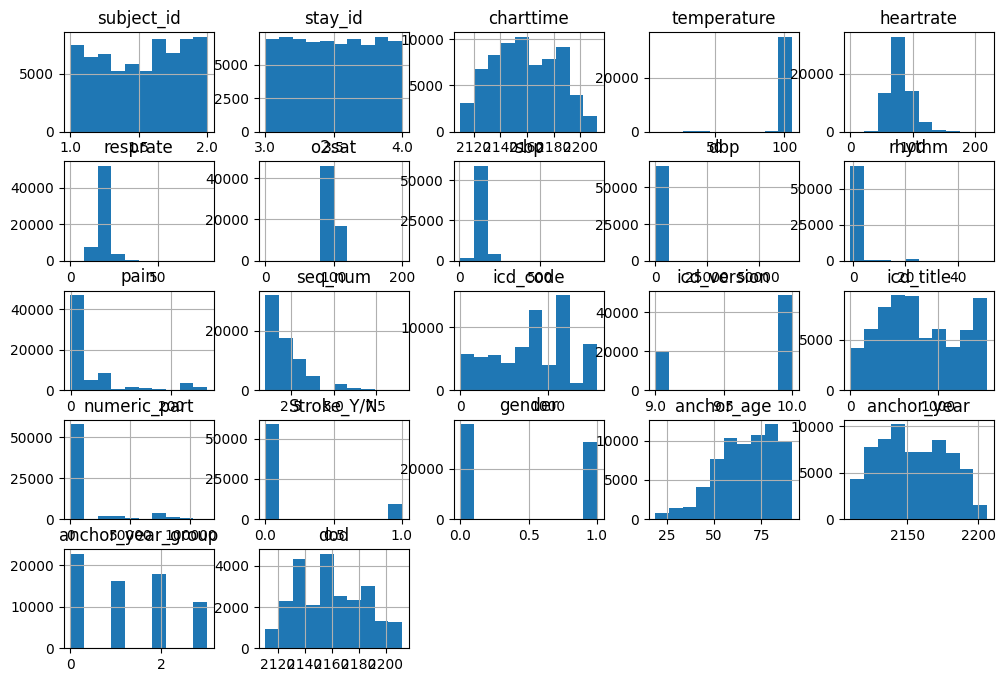

In [12]:
df.hist(figsize=(12, 8))

In [13]:
import seaborn as sns

corr_matrix = df.corr()
correlations = corr_matrix['Stroke_Y/N'].sort_values(ascending=False)
print(correlations)

Stroke_Y/N           1.000000
anchor_year_group    0.168800
icd_version          0.111783
pain                 0.072855
sbp                  0.061200
anchor_age           0.049497
gender               0.026024
stay_id              0.007151
subject_id          -0.001285
dbp                 -0.001860
resprate            -0.004625
dod                 -0.009216
rhythm              -0.013077
heartrate           -0.013434
anchor_year         -0.015200
o2sat               -0.015311
temperature         -0.025990
charttime           -0.028509
icd_title           -0.082804
icd_code            -0.095528
numeric_part        -0.151145
seq_num             -0.290460
Name: Stroke_Y/N, dtype: float64


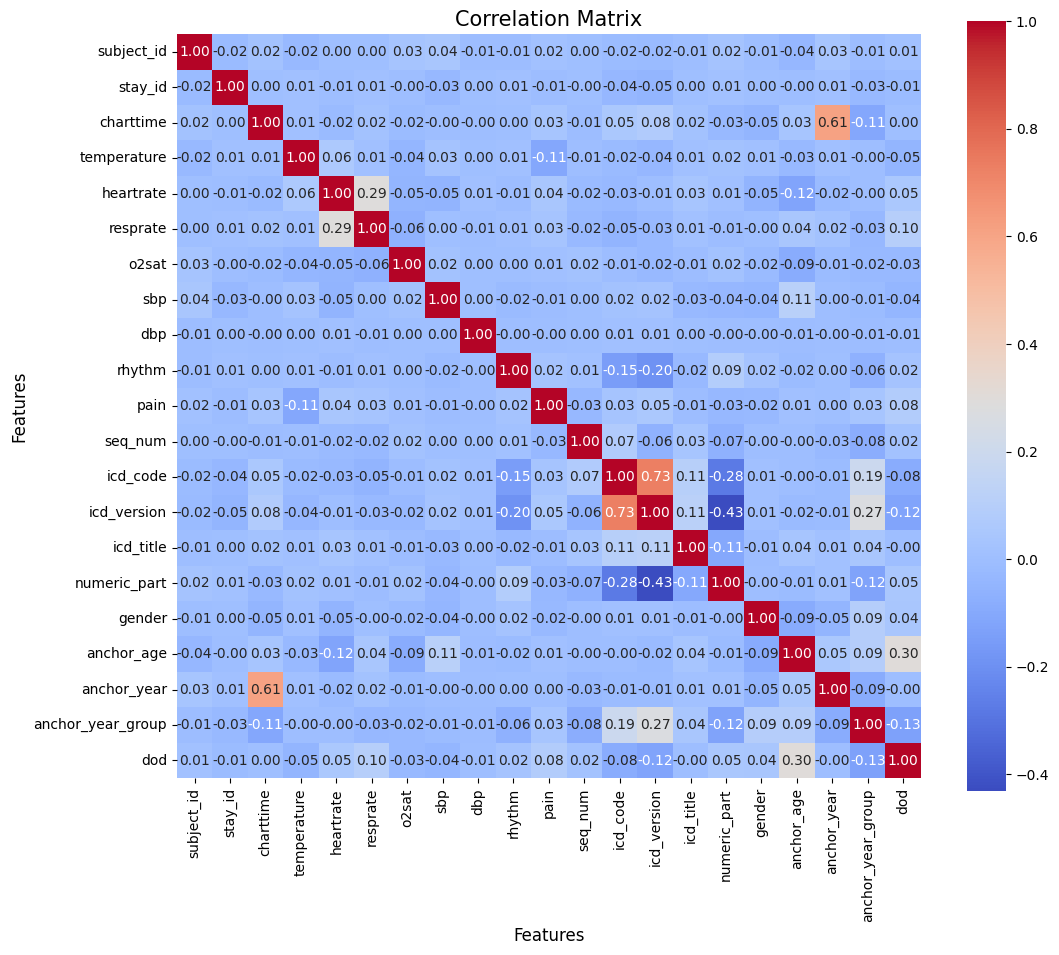

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df_inputs = df.drop('Stroke_Y/N', axis=1)

# Compute the correlation matrix
corr_matrix = df_inputs.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Add titles and labels
plt.title('Correlation Matrix', size=15)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)

# Display the plot
plt.show()


<ipython-input-15-27578e74abff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


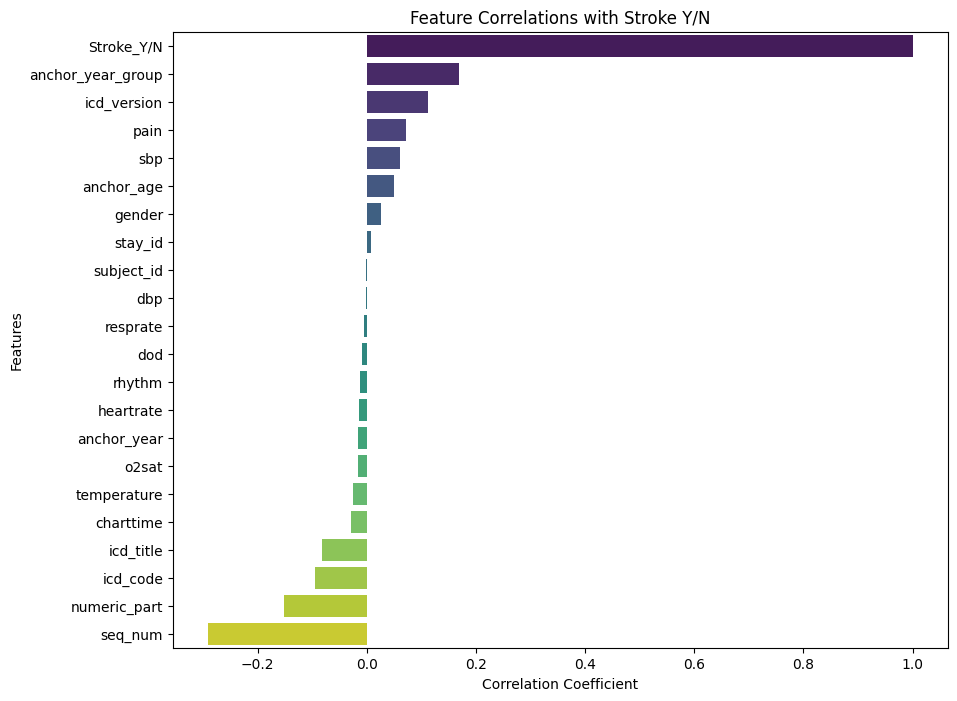

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

correlations = corr_matrix['Stroke_Y/N'].sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')

# Add titles and labels
plt.title('Feature Correlations with Stroke Y/N')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Display the plot
plt.show()


In [16]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/01_eda_output', index = False)